In [2]:
# import neccessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
# import the dataset which is a excel file
dataset = pd.read_excel('loan-predictionUC.xlsx')

In [4]:
# fill the missing data by using mean 
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean(), inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mean(), inplace=True)

In [5]:
# fill the missing data using mode
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

In [6]:
le = LabelEncoder()
dataset['Loan_ID'] = le.fit_transform(dataset['Loan_ID'])

In [7]:
dataset = pd.get_dummies(dataset, drop_first=True)

Text(0.5, 1.0, 'Distribution of Applicant Income')

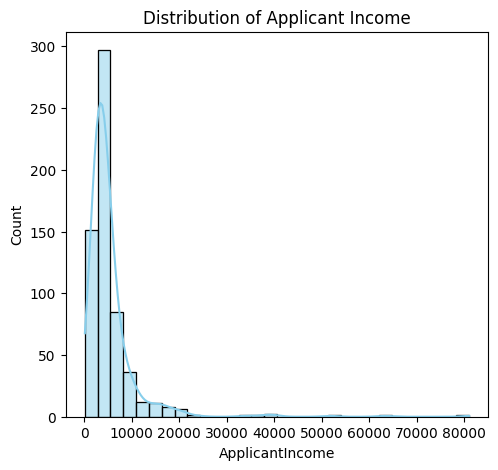

In [8]:
# start plotting graphs using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(dataset['ApplicantIncome'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Applicant Income')

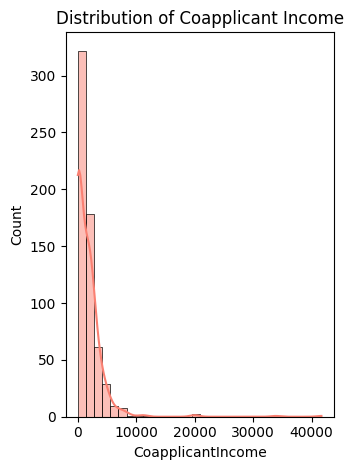

In [9]:
plt.subplot(1, 2, 2)
sns.histplot(dataset['CoapplicantIncome'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Coapplicant Income')
plt.tight_layout()
plt.show()

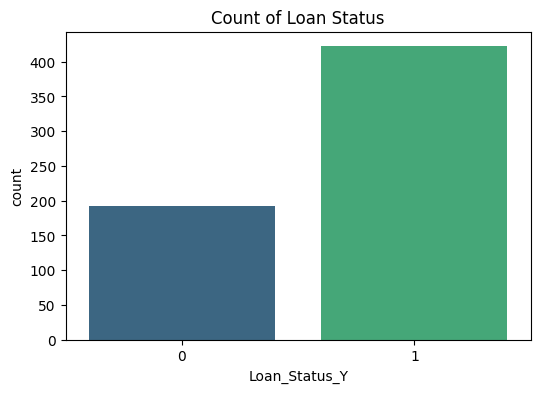

In [10]:
# count how many loans have been sanctioned and not sanctioned
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status_Y', data=dataset, palette='viridis')
plt.title('Count of Loan Status')
plt.show()

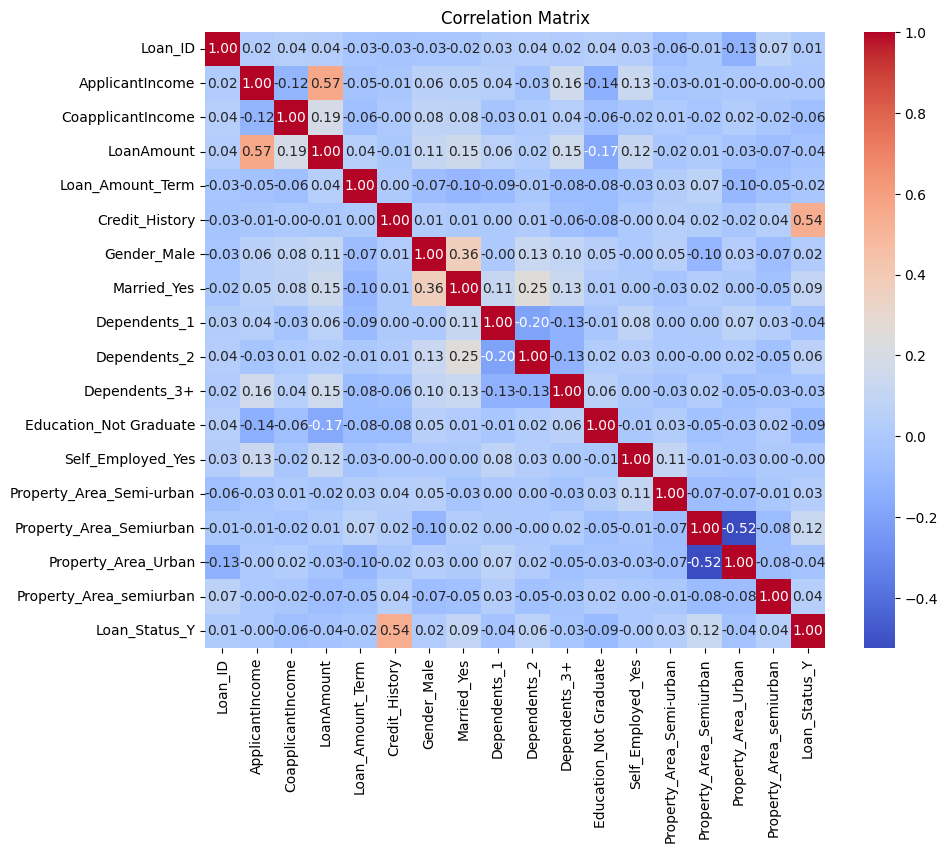

In [11]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
x = dataset.drop('Loan_Status_Y', axis=1)
y = dataset['Loan_Status_Y']

In [19]:
X_dropped = x.drop(['Loan_Amount_Term', 'Property_Area_Semiurban', 'Property_Area_Urban', 
                    'Married_Yes', 'Education_Not Graduate', 'Dependents_1', 
                    'Gender_Male', 'Self_Employed_Yes', 'Dependents_2', 
                    'Dependents_3+', 'Property_Area_semiurban', 'Property_Area_Semi-urban'], axis=1)


In [14]:
print("Remaining Features:")
print(X_dropped.columns)

Remaining Features:
Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History'],
      dtype='object')


In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [20]:
# train the model
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)

KeyboardInterrupt: 

In [ ]:
# use hyperparameters to enhance the effiency
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# cross validation method
cv_scores_dropped = cross_val_score(best_model, X_dropped, y, cv=5)
print("Cross-Validation Scores with Dropped Features:", cv_scores_dropped)
print("Mean CV Accuracy with Dropped Features:", np.mean(cv_scores_dropped))

Cross-Validation Scores with Dropped Features: [0.78861789 0.7804878  0.7804878  0.84552846 0.82786885]
Mean CV Accuracy with Dropped Features: 0.8045981607357058


In [ ]:
# divide data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# fitting the model, training and checking for accuracy 
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [ ]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [ ]:
print(accuracy_train)
print(accuracy_test)

0.8309572301425662
0.7886178861788617


The successful implementation of the Loan Sanction Predictor is expected to yield the following benefits:

Efficiency: Streamlining the loan approval process, leading to faster decision-making.

Risk Management: Enhancing the ability to identify and manage potential risks associated with lending.

Customer Satisfaction: Providing applicants with a transparent and efficient loan approval experience.

Data-Driven Decision-Making: Empowering financial institutions with actionable insights for informed decision-making.

The Loan Sanction Predictor project represents a significant step towards leveraging advanced analytics to optimize financial processes, aligning with the evolving landscape of data-driven decision-making in the banking sector